In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## Loading the data

In [2]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Checking Null values

In [6]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Imputing null values with mean

In [7]:
df = df.fillna(df.mean())

C:\Users\SNEHIT REDDY\AppData\Local\Temp\ipykernel_3084\114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

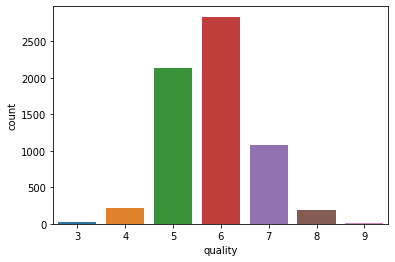

In [9]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='quality', data=df)

## Checking duplicated values

In [10]:
df.duplicated().sum()

1168

### Dropping the duplicated values

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(5329, 13)

<AxesSubplot:>

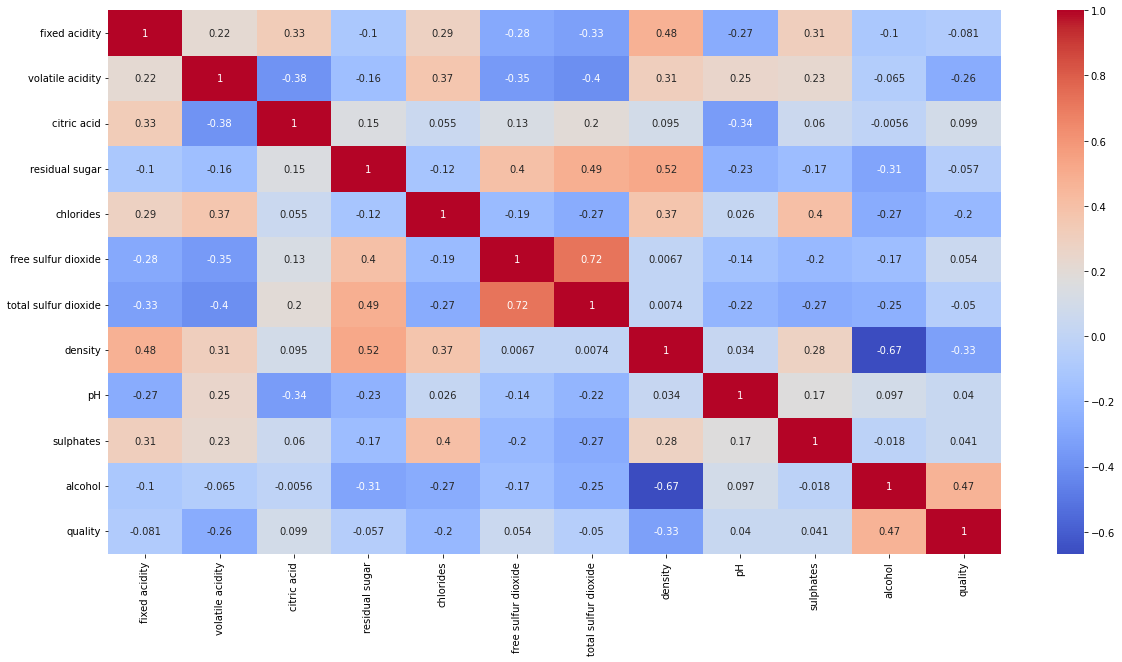

In [13]:
cor = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [14]:
df.duplicated().sum()

0

## Checking Outliers

In [15]:
# import warnings

# # outlier check
# plt.figure(figsize=(15, 20))

# for i, c in enumerate(df.drop('quality', axis=1).select_dtypes(include='number').columns):
#     plt.subplot(10,2,i*2+1)
#     sns.boxplot(df[c], color='blue')
#     plt.title('Distribution plot for field:' + c)
#     plt.xlabel('')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    
#     plt.subplot(10,2,i*2+2)
#     sns.boxplot(df[c].apply('log1p'), color='red')
#     plt.title('Log1p distribution plot for field:' + c)
#     plt.xlabel('')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [16]:
df['type'].unique()

array(['white', 'red'], dtype=object)

## Treating cat variables

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.type.head()

0    1
1    1
2    1
3    1
6    1
Name: type, dtype: int32

In [18]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   int32  
 1   fixed acidity         5329 non-null   float64
 2   volatile acidity      5329 non-null   float64
 3   citric acid           5329 non-null   float64
 4   residual sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 562.0 KB


## Data splitting

In [20]:
target = 'quality'
y = df[target]
X = df.drop(target,axis=1)

In [21]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


## Data Balancing using SMOTE

In [22]:
y.value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X_resampled, y_resampled = oversample.fit_resample(X,y)

In [24]:
X_resampled.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [25]:
df['quality'] = df['quality'].apply({3:0,4:1,5:2,6:3,7:4,8:5,9:6}.get)

In [26]:
y.value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [27]:
y_resampled.value_counts()

6    2327
5    2327
7    2327
8    2327
4    2327
3    2327
9    2327
Name: quality, dtype: int64

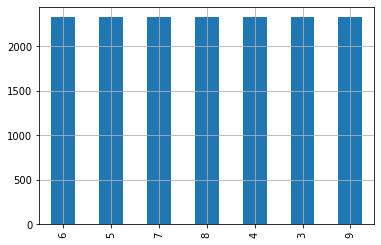

In [28]:
pd.Series(y_resampled).value_counts().plot.bar()
plt.grid()

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


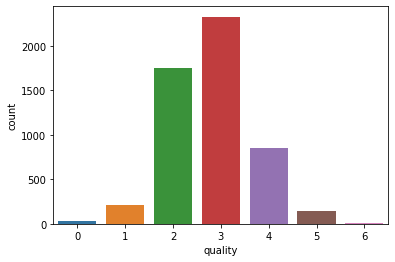

In [29]:
sns.countplot(df['quality'])
plt.show()

## Train test split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.05,random_state=123)

# Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
#checking the mean value after scaling
scaler.mean_

array([7.60824609e-01, 7.27933628e+00, 3.70886843e-01, 3.19492103e-01,
       4.71221961e+00, 5.29207213e-02, 2.98520078e+01, 1.11656082e+02,
       9.93888507e-01, 3.24734797e+00, 5.16024535e-01, 1.09341626e+01])

In [33]:
X_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
9475,0,7.528918,0.864768,0.000000,2.129360,0.086881,14.412805,25.293598,0.996589,3.447704,0.491788,10.165122
15795,1,7.234814,0.346303,0.356741,5.174003,0.020587,52.586548,119.760940,0.990896,3.267825,0.375219,12.349968
4319,0,7.700000,0.260000,0.300000,1.700000,0.059000,20.000000,38.000000,0.994900,3.290000,0.470000,10.800000
12399,1,6.222377,0.257832,0.336685,2.445173,0.034443,12.220982,75.222377,0.990923,3.282182,0.562210,11.411328
7137,0,9.957364,0.732803,0.426975,2.161799,0.069034,13.820083,47.764017,0.999367,3.272921,0.562360,9.267406
...,...,...,...,...,...,...,...,...,...,...,...,...
12252,1,7.796326,0.346789,0.490000,8.762381,0.033000,41.036738,184.073476,0.993261,3.136789,0.380000,12.367891
1346,1,9.300000,0.310000,0.490000,1.300000,0.042000,34.000000,147.000000,0.994800,3.110000,0.460000,9.800000
11646,0,5.223840,0.450960,0.068112,2.047679,0.046477,16.761605,88.619198,0.991725,3.593312,0.822880,13.600000
15725,1,8.244376,0.254901,0.404702,6.271549,0.032987,27.496692,131.549624,0.993754,3.240265,0.470066,11.456947


In [34]:
X_test

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2001,1,8.000000,0.360000,0.390000,1.600000,0.024000,26.000000,93.000000,0.991160,3.150000,0.490000,11.900000
174,1,6.900000,0.540000,0.320000,13.200000,0.050000,53.000000,236.000000,0.997300,3.200000,0.500000,9.600000
9225,1,6.902775,0.230832,0.321387,2.202054,0.036569,19.000000,67.229189,0.990406,3.111737,0.380277,11.931243
12694,1,6.451876,0.185188,0.320000,1.065090,0.039349,39.000000,119.084831,0.989541,3.279625,0.404339,12.687764
11613,0,10.411146,0.240000,0.455542,1.800000,0.075223,6.000000,21.111456,0.997600,3.245542,1.023344,10.800000
...,...,...,...,...,...,...,...,...,...,...,...,...
11753,0,7.909075,0.339017,0.360076,1.897731,0.065015,5.007563,10.000000,0.994200,3.269697,0.540303,11.199244
1533,1,7.500000,0.330000,0.390000,12.400000,0.065000,29.000000,119.000000,0.997400,3.160000,0.390000,9.400000
10221,1,7.388541,0.304920,0.455248,12.388541,0.049393,61.426279,139.393430,0.996873,3.050160,0.430328,9.768831
12830,0,6.202705,0.375369,0.253413,5.769614,0.032193,14.260145,84.233091,0.992852,3.236046,0.616587,11.393236


In [35]:
X_train_scaled

array([[-1.78354483,  0.20683655,  2.53694473, ...,  1.34367836,
        -0.18184849, -0.612299  ],
       [ 0.56068117, -0.03689745, -0.1262806 , ...,  0.13732779,
        -1.05648021,  1.12724317],
       [-1.78354483,  0.34861805, -0.56959783, ...,  0.28604347,
        -0.34532691, -0.10681831],
       ...,
       [-1.78354483, -1.70345871,  0.41131504, ...,  2.32019107,
         2.30236596,  2.12250061],
       [ 0.56068117,  0.79976053, -0.59579139, ..., -0.04750384,
        -0.34483047,  0.41623355],
       [ 0.56068117, -0.56298863,  0.046812  , ..., -1.39056778,
        -1.09563741,  1.24669675]])

In [36]:
# converting the Scaled data to dataframe because it will give np arrays as output
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

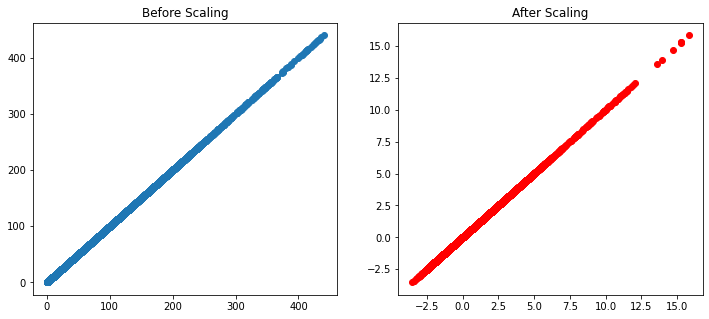

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train, X_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled, X_train_scaled,color='red')
ax2.set_title("After Scaling")
plt.show()


# below we can observe that the origin has changed after scaling 

## Correlation

<AxesSubplot:>

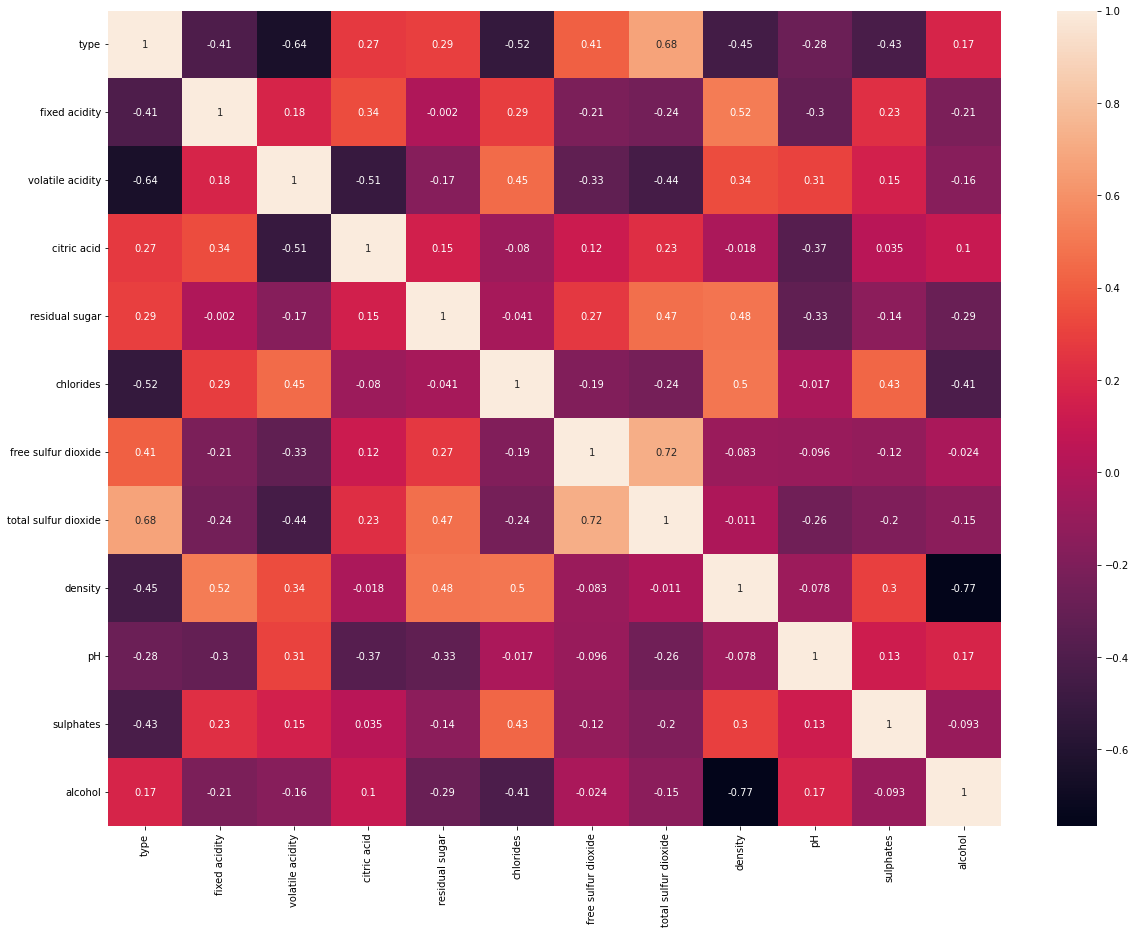

In [38]:
# Checking correlation
plt.figure(figsize=(20,15))
cor = X_train.corr()
sns.heatmap(cor,annot=True)

In [39]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in  range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

## Threshold = 0.5

In [40]:
corr_features = correlation(X_train,0.5)
len(set(corr_features))
print('correlated features are :',len(set(corr_features)))

correlated features are : 6


In [41]:
print('corr_features are:',corr_features)

corr_features are: {'alcohol', 'total sulfur dioxide', 'citric acid', 'chlorides', 'density', 'volatile acidity'}


In [42]:
X_train.shape

(15474, 12)

In [43]:
X_train_noncorr1 = X_train.drop(corr_features,axis=1)
X_test_noncorr1 = X_test.drop(corr_features,axis=1)

In [44]:
X_train_noncorr1.shape,X_test_noncorr1.shape

((15474, 6), (815, 6))

## Threshold = 0.6

In [45]:
corr_features1 = correlation(X_train,0.6)
len(set(corr_features1))
print('correlated features are :',len(set(corr_features1)))

correlated features are : 3


In [46]:
print('corr_features are:',corr_features1)

corr_features are: {'alcohol', 'volatile acidity', 'total sulfur dioxide'}


In [47]:
X_train_noncorr2 = X_train.drop(corr_features1,axis=1)
X_test_noncorr2= X_test.drop(corr_features1,axis=1)

In [48]:
X_train_noncorr2.shape,X_test_noncorr2.shape

((15474, 9), (815, 9))

## threshold = 0.7

In [49]:
corr_features2 = correlation(X_train,0.7)
len(set(corr_features2))
print('correlated features are :',len(set(corr_features2)))

correlated features are : 2


In [50]:
print('corr_features are:',corr_features2)
X_train_noncorr3 = X_train.drop(corr_features2,axis=1)
X_test_noncorr3= X_test.drop(corr_features2,axis=1)

corr_features are: {'alcohol', 'total sulfur dioxide'}


In [51]:
X_train_noncorr3.shape,X_test_noncorr3.shape

((15474, 10), (815, 10))

## Threshold = 0.8

In [52]:
corr_features3 = correlation(X_train,0.9)
len(set(corr_features3))
print('correlated features are :',len(set(corr_features3)))

correlated features are : 0


## Model Building

In [53]:
from sklearn.linear_model import LogisticRegression

 # Model on original data

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

# Extra tree

In [55]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)


ExtraTreesClassifier()

In [56]:
y_train_ = etc.predict(X_train)
y_test_  = etc.predict(X_test)

In [57]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9928    1.0000    0.9964       138
           4     0.9474    0.9844    0.9655       128
           5     0.7890    0.7049    0.7446       122
           6     0.6458    0.5536    0.5962       112
           7     0.7647    0.8922    0.8235       102
           8     0.9279    0.9810    0.9537       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8761       815
   macro avg     0.8668    0.8737    0.8686       815
weighted avg     0.8715    0.8761    0.8722       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

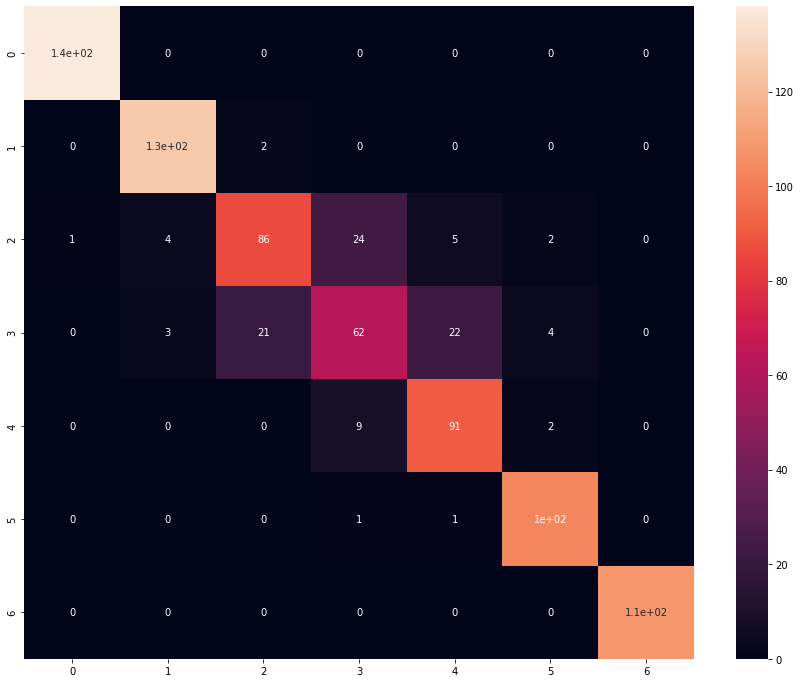

In [58]:

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_)
sns.heatmap(cr,annot=True)


# Threshold = 0.5

In [59]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc1 = ExtraTreesClassifier()
etc1.fit(X_train_noncorr1, y_train)


ExtraTreesClassifier()

In [60]:
y_test_1  = etc1.predict(X_test_noncorr1)

In [61]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_1,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9388    1.0000    0.9684       138
           4     0.8485    0.8750    0.8615       128
           5     0.5688    0.5082    0.5368       122
           6     0.5165    0.4196    0.4631       112
           7     0.6250    0.6863    0.6542       102
           8     0.8333    0.9048    0.8676       105
           9     0.9818    1.0000    0.9908       108

    accuracy                         0.7755       815
   macro avg     0.7590    0.7706    0.7632       815
weighted avg     0.7640    0.7755    0.7682       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

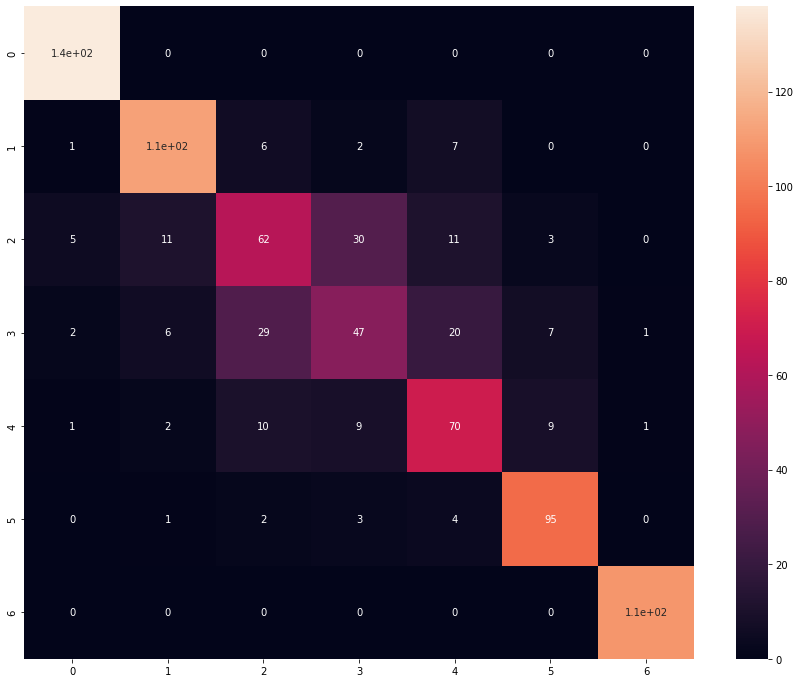

In [62]:

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_1)
sns.heatmap(cr,annot=True)


# Threshold = 0.6

In [63]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc2 = ExtraTreesClassifier()
etc2.fit(X_train_noncorr2, y_train)


ExtraTreesClassifier()

In [64]:
y_test_2  = etc2.predict(X_test_noncorr2)

In [65]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_2,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9857    1.0000    0.9928       138
           4     0.9111    0.9609    0.9354       128
           5     0.7350    0.7049    0.7197       122
           6     0.5978    0.4911    0.5392       112
           7     0.7788    0.8627    0.8186       102
           8     0.9364    0.9810    0.9581       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8601       815
   macro avg     0.8493    0.8572    0.8520       815
weighted avg     0.8528    0.8601    0.8552       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

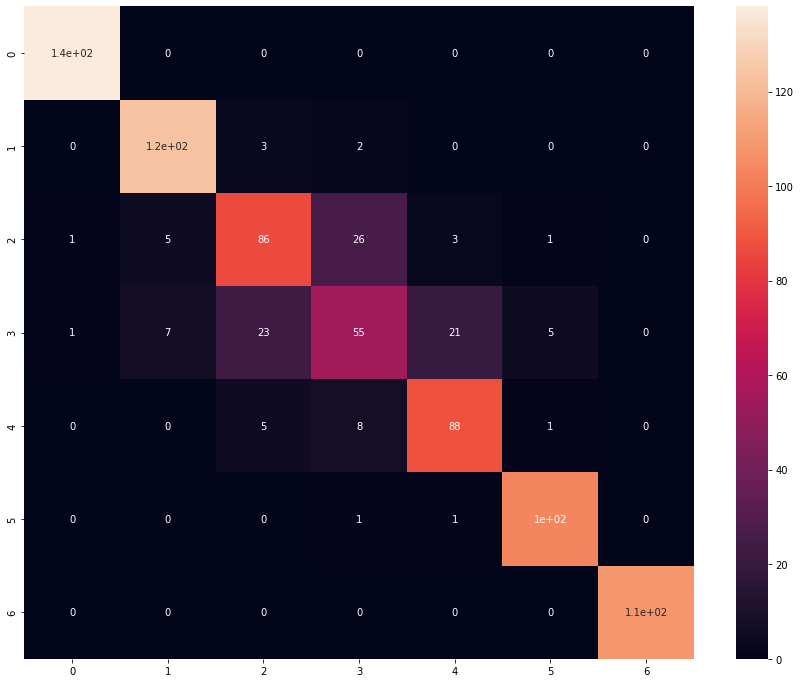

In [66]:

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_2)
sns.heatmap(cr,annot=True)


# threshold = 0.7

In [67]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc3 = ExtraTreesClassifier()
etc3.fit(X_train_noncorr3, y_train)


ExtraTreesClassifier()

In [68]:
y_test_3  = etc3.predict(X_test_noncorr3)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_3,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9856    0.9928    0.9892       138
           4     0.9248    0.9609    0.9425       128
           5     0.7477    0.6803    0.7124       122
           6     0.5859    0.5179    0.5498       112
           7     0.7500    0.8529    0.7982       102
           8     0.9358    0.9714    0.9533       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8564       815
   macro avg     0.8471    0.8537    0.8493       815
weighted avg     0.8515    0.8564    0.8529       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

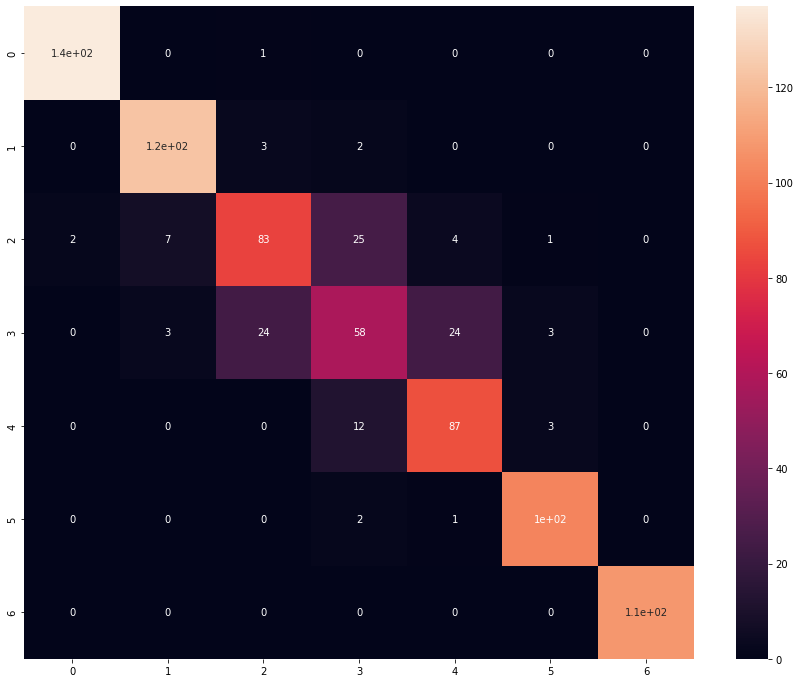

In [69]:

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_3)
sns.heatmap(cr,annot=True)


# DTC

In [70]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
DTR.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
DT = DTR.predict(X_test)

In [72]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, DT,digits=4))



Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9627    0.9348    0.9485       138
           4     0.8248    0.8828    0.8528       128
           5     0.6174    0.5820    0.5992       122
           6     0.4476    0.4196    0.4332       112
           7     0.6356    0.7353    0.6818       102
           8     0.8673    0.8095    0.8374       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.7706       815
   macro avg     0.7651    0.7663    0.7647       815
weighted avg     0.7703    0.7706    0.7695       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

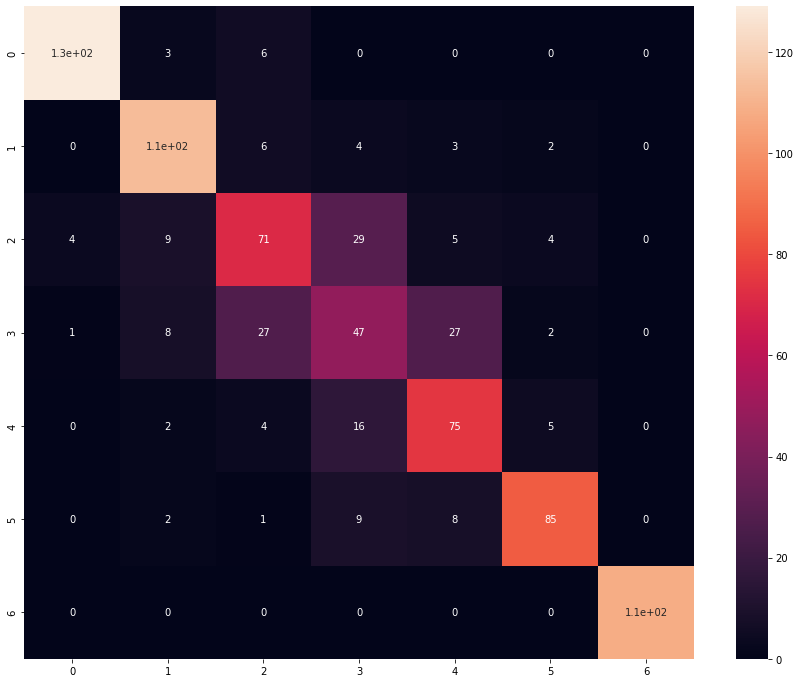

In [73]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, DT)
sns.heatmap(cr,annot=True)

# Threshold = 0.5

In [74]:
from sklearn.tree import DecisionTreeClassifier
DTR1 = DecisionTreeClassifier()
DTR1.fit(X_train_noncorr1, y_train)

DecisionTreeClassifier()

In [75]:
DT1 = DTR1.predict(X_test_noncorr1)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, DT1,digits=4))



Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9214    0.9348    0.9281       138
           4     0.6879    0.7578    0.7212       128
           5     0.4144    0.3770    0.3948       122
           6     0.4059    0.3661    0.3850       112
           7     0.4851    0.4804    0.4828       102
           8     0.7500    0.8000    0.7742       105
           9     0.9725    0.9815    0.9770       108

    accuracy                         0.6773       815
   macro avg     0.6625    0.6711    0.6661       815
weighted avg     0.6681    0.6773    0.6720       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

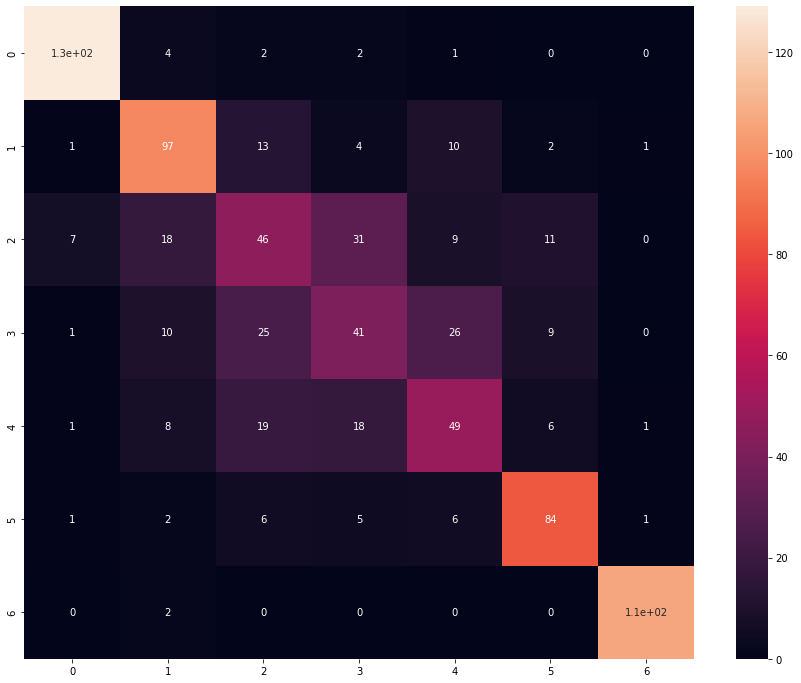

In [76]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, DT1)
sns.heatmap(cr,annot=True)

# Threshold = 0.6

In [77]:
from sklearn.tree import DecisionTreeClassifier
DTR2 = DecisionTreeClassifier()
DTR2.fit(X_train_noncorr2, y_train)

DecisionTreeClassifier()

In [78]:
DT2 = DTR2.predict(X_test_noncorr2)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, DT2,digits=4))



Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9504    0.9710    0.9606       138
           4     0.7730    0.8516    0.8104       128
           5     0.5354    0.4344    0.4796       122
           6     0.4412    0.4018    0.4206       112
           7     0.6364    0.6863    0.6604       102
           8     0.8070    0.8762    0.8402       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.7497       815
   macro avg     0.7348    0.7459    0.7388       815
weighted avg     0.7392    0.7497    0.7429       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

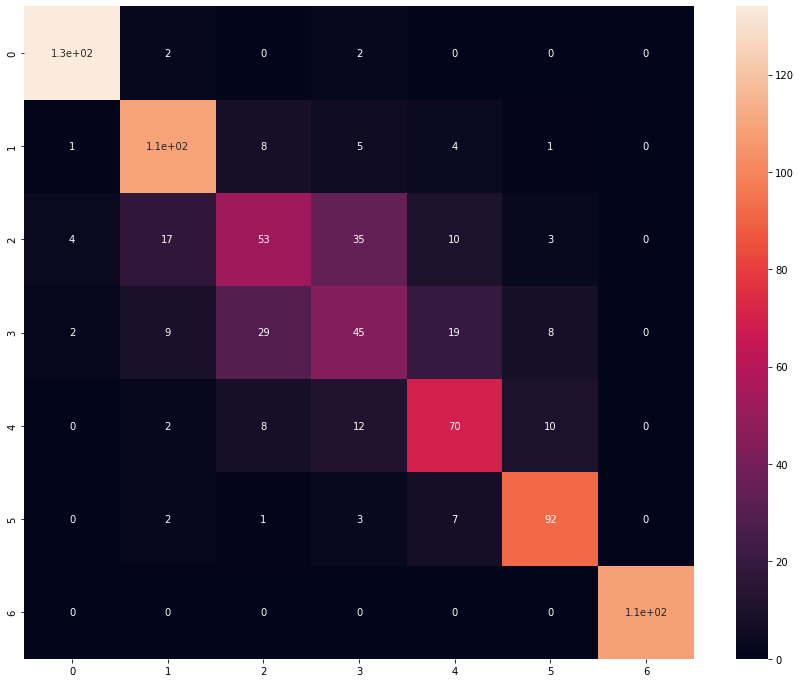

In [79]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, DT2)
sns.heatmap(cr,annot=True)

# Threshold = 0.7

In [80]:
from sklearn.tree import DecisionTreeClassifier
DTR3 = DecisionTreeClassifier()
DTR3.fit(X_train_noncorr3, y_train)

DecisionTreeClassifier()

In [81]:
DT3 = DTR3.predict(X_test_noncorr3)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, DT3,digits=4))



Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9712    0.9783    0.9747       138
           4     0.8281    0.8281    0.8281       128
           5     0.5826    0.5492    0.5654       122
           6     0.4444    0.3929    0.4171       112
           7     0.5714    0.6667    0.6154       102
           8     0.7757    0.7905    0.7830       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.7497       815
   macro avg     0.7391    0.7437    0.7405       815
weighted avg     0.7468    0.7497    0.7475       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

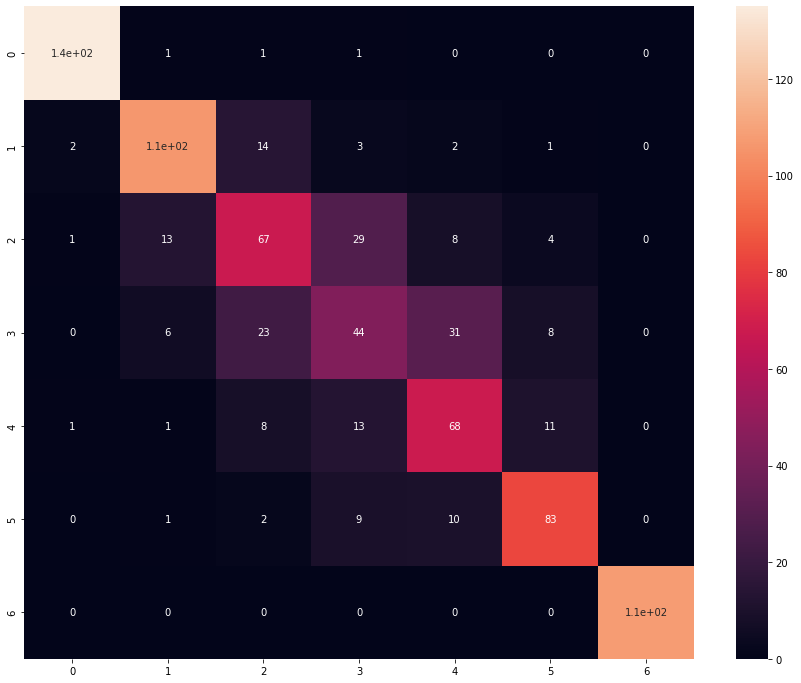

In [82]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, DT3)
sns.heatmap(cr,annot=True)

# Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient boosting
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)


GradientBoostingClassifier()

In [84]:
#GB1 = GB.predict(X_train)
GB_test = GB.predict(X_test)

In [85]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, GB_test,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.8836    0.9348    0.9085       138
           4     0.7481    0.7656    0.7568       128
           5     0.5378    0.5246    0.5311       122
           6     0.5294    0.4821    0.5047       112
           7     0.5604    0.5000    0.5285       102
           8     0.7094    0.7905    0.7477       105
           9     0.9908    1.0000    0.9954       108

    accuracy                         0.7202       815
   macro avg     0.7085    0.7139    0.7104       815
weighted avg     0.7132    0.7202    0.7159       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

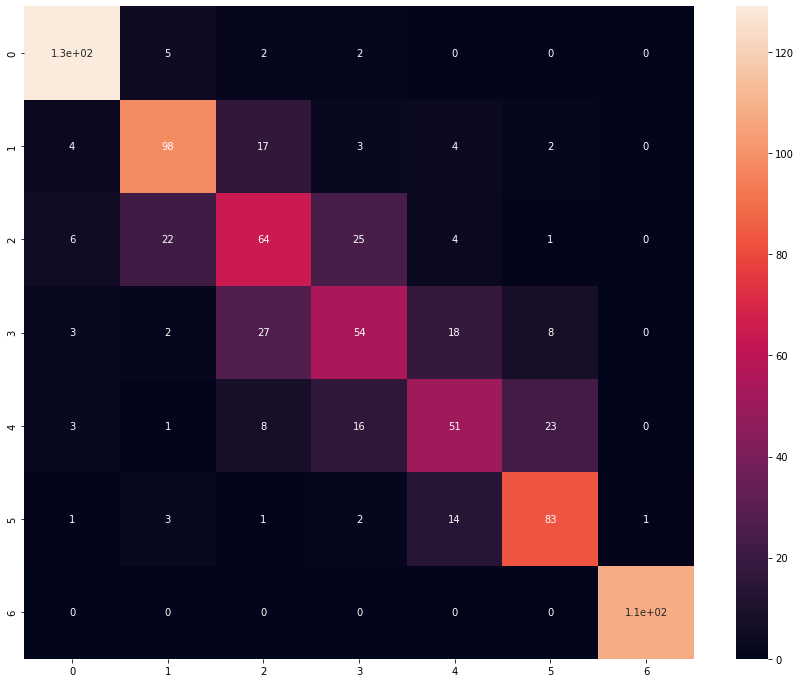

In [86]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, GB_test)
sns.heatmap(cr,annot=True)

# Threshold = 0.5

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient boosting
GB1 = GradientBoostingClassifier()
GB1.fit(X_train_noncorr1, y_train)


GradientBoostingClassifier()

In [88]:
GB_test1 = GB1.predict(X_test_noncorr1)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, GB_test1,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.7584    0.8188    0.7875       138
           4     0.6126    0.5312    0.5690       128
           5     0.3937    0.4098    0.4016       122
           6     0.5190    0.3661    0.4293       112
           7     0.3918    0.3725    0.3819       102
           8     0.5308    0.6571    0.5872       105
           9     0.8852    1.0000    0.9391       108

    accuracy                         0.5975       815
   macro avg     0.5845    0.5937    0.5851       815
weighted avg     0.5896    0.5975    0.5897       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

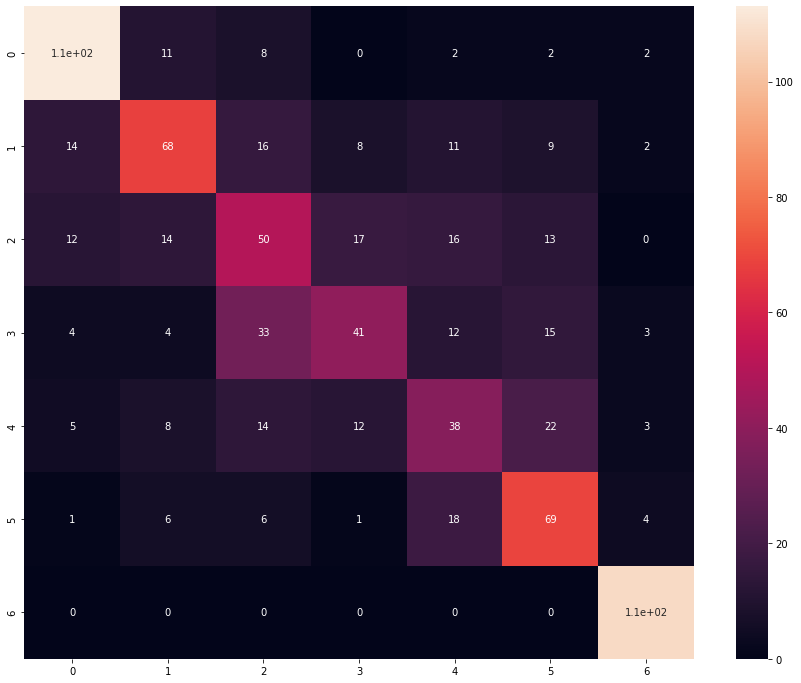

In [89]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, GB_test1)
sns.heatmap(cr,annot=True)

# Threshold = 0.6

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.8121    0.8768    0.8432       138
           4     0.7120    0.6953    0.7036       128
           5     0.5152    0.5574    0.5354       122
           6     0.5476    0.4107    0.4694       112
           7     0.4894    0.4510    0.4694       102
           8     0.7213    0.8381    0.7753       105
           9     0.9908    1.0000    0.9954       108

    accuracy                         0.6945       815
   macro avg     0.6840    0.6899    0.6845       815
weighted avg     0.6872    0.6945    0.6885       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

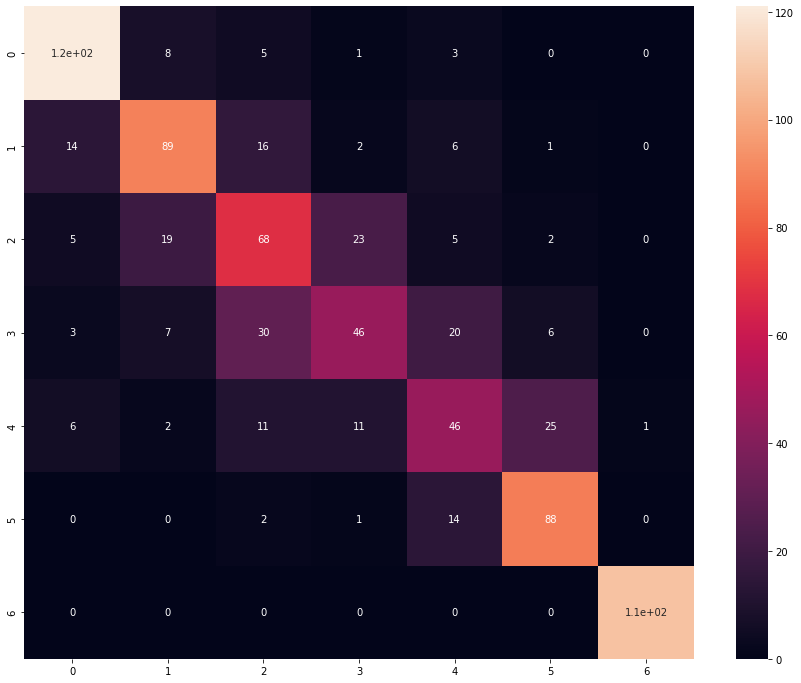

In [90]:
GB2 = GradientBoostingClassifier()
GB2.fit(X_train_noncorr2, y_train)

GB_test2 = GB2.predict(X_test_noncorr2)

# Classification report
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, GB_test2,digits=4))

# Confusion Matric

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, GB_test2)
sns.heatmap(cr,annot=True)

# Threshold = 0.7

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.8288    0.8768    0.8521       138
           4     0.7252    0.7422    0.7336       128
           5     0.5798    0.5656    0.5726       122
           6     0.5882    0.4464    0.5076       112
           7     0.5093    0.5392    0.5238       102
           8     0.7350    0.8190    0.7748       105
           9     0.9908    1.0000    0.9954       108

    accuracy                         0.7166       815
   macro avg     0.7082    0.7128    0.7086       815
weighted avg     0.7116    0.7166    0.7123       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

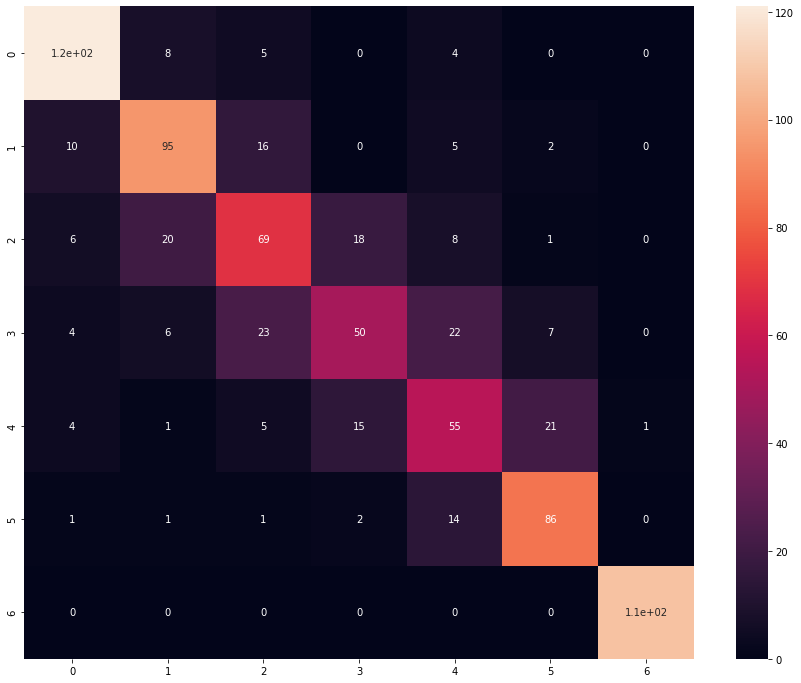

In [91]:
GB3 = GradientBoostingClassifier()
GB3.fit(X_train_noncorr3, y_train)

GB_test3 = GB3.predict(X_test_noncorr3)

# Classification report

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, GB_test3,digits=4))

# Confusion Matric

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, GB_test3)
sns.heatmap(cr,annot=True)

# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           3       0.31      0.41      0.35       138
           4       0.38      0.52      0.44       128
           5       0.22      0.15      0.18       122
           6       0.23      0.04      0.07       112
           7       0.21      0.09      0.12       102
           8       0.37      0.50      0.42       105
           9       0.35      0.56      0.44       108

    accuracy                           0.33       815
   macro avg       0.30      0.32      0.29       815
weighted avg       0.30      0.33      0.29       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

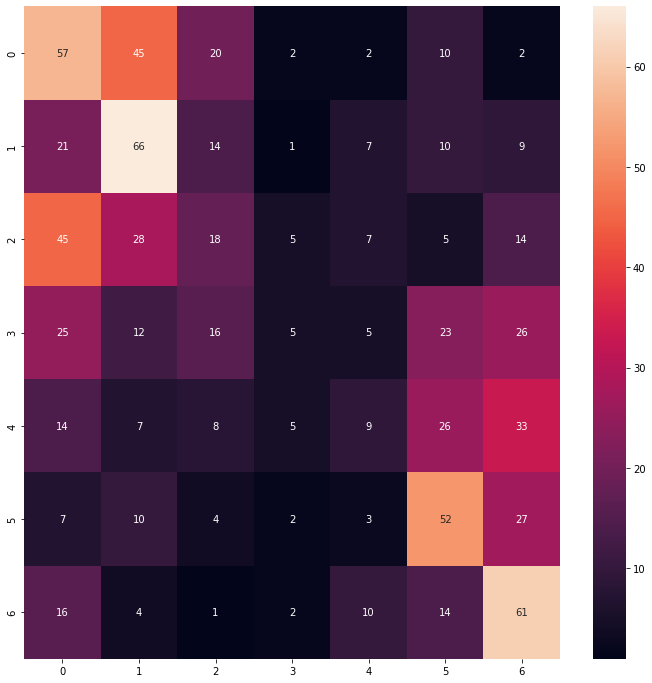

In [94]:
plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, LR_pred)
sns.heatmap(cr,annot=True)

# Threshold = 0.5

In [95]:
LR1 = LogisticRegression()
LR1.fit(X_train_noncorr1,y_train)
LR_test1 = LR1.predict(X_test_noncorr1)

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           3     0.3032    0.4130    0.3497       138
           4     0.3562    0.4062    0.3796       128
           5     0.1818    0.0820    0.1130       122
           6     0.2778    0.0446    0.0769       112
           7     0.1429    0.0098    0.0183       102
           8     0.3046    0.4381    0.3594       105
           9     0.3600    0.8333    0.5028       108

    accuracy                         0.3202       815
   macro avg     0.2752    0.3182    0.2571       815
weighted avg     0.2775    0.3202    0.2615       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

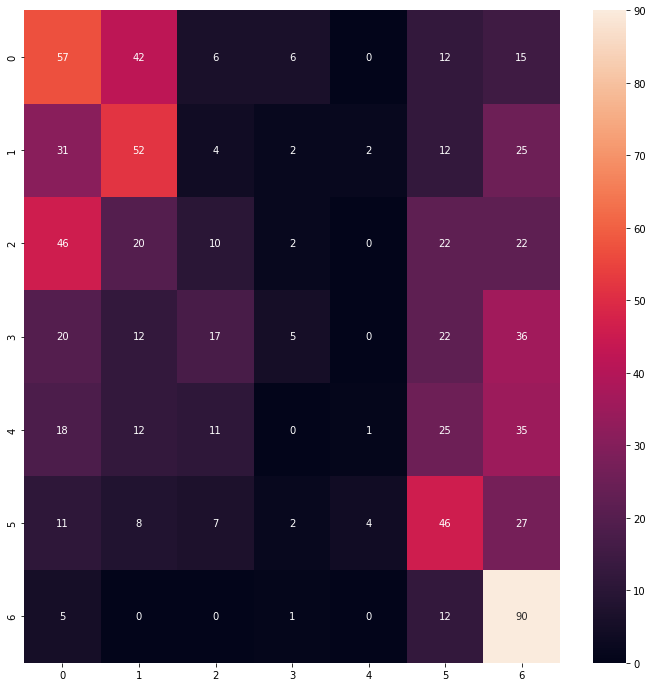

In [96]:
print(classification_report(y_test,LR_test1,digits=4))

# Confusion matrix
plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, LR_test1)
sns.heatmap(cr,annot=True)

# Threshold = 0.6

In [97]:
LR2 = LogisticRegression()
LR2.fit(X_train_noncorr2,y_train)
LR_test2 = LR2.predict(X_test_noncorr2)

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           3     0.3370    0.4420    0.3824       138
           4     0.3878    0.4453    0.4145       128
           5     0.3137    0.1311    0.1850       122
           6     0.2258    0.0625    0.0979       112
           7     0.1429    0.0098    0.0183       102
           8     0.2866    0.4476    0.3494       105
           9     0.3932    0.8519    0.5380       108

    accuracy                         0.3448       815
   macro avg     0.2981    0.3415    0.2837       815
weighted avg     0.3029    0.3448    0.2896       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

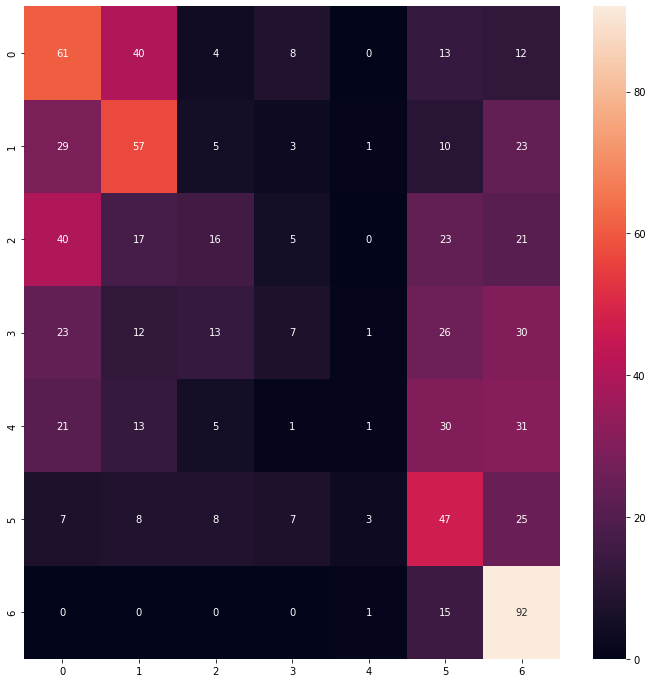

In [98]:
print(classification_report(y_test,LR_test2,digits=4))

# Confusion matrix
plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, LR_test2)
sns.heatmap(cr,annot=True)

# Threshold = 0.7

              precision    recall  f1-score   support

           3     0.4220    0.5290    0.4695       138
           4     0.4404    0.3750    0.4051       128
           5     0.2165    0.1721    0.1918       122
           6     0.1111    0.0089    0.0165       112
           7     0.2727    0.0882    0.1333       102
           8     0.3137    0.4571    0.3721       105
           9     0.3444    0.7685    0.4756       108

    accuracy                         0.3472       815
   macro avg     0.3030    0.3427    0.2948       815
weighted avg     0.3085    0.3472    0.3017       815

Confusion matrix
-------------------------------------------------------


C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

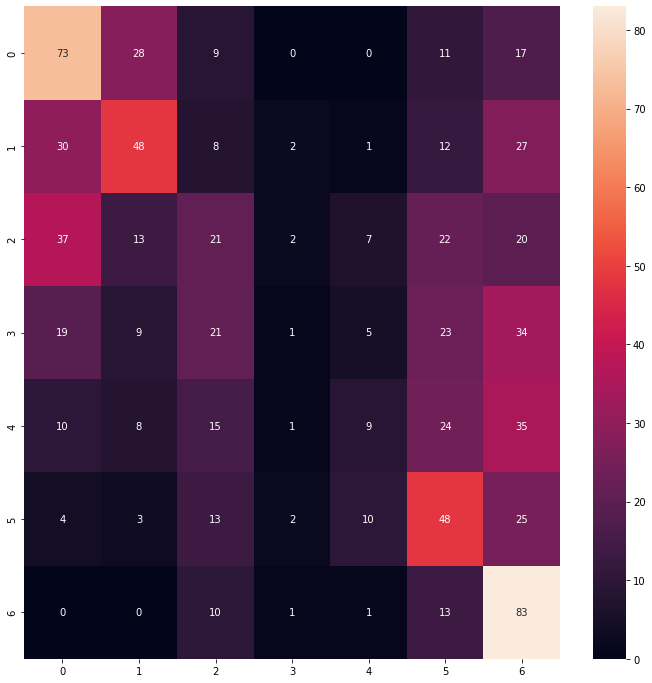

In [99]:
LR3 = LogisticRegression()
LR3.fit(X_train_noncorr3,y_train)
LR_test3 = LR3.predict(X_test_noncorr3)

# Classification report

print(classification_report(y_test,LR_test3,digits=4))

# Confusion matrix

plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, LR_test3)
sns.heatmap(cr,annot=True)

# SVC

SVC(random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3       0.40      0.45      0.43      2189
           4       0.35      0.47      0.40      2199
           5       0.30      0.34      0.31      2205
           6       0.20      0.02      0.04      2215
           7       0.22      0.04      0.06      2225
           8       0.31      0.22      0.26      2222
           9       0.38      0.91      0.53      2219

    accuracy                           0.35     15474
   macro avg       0.31      0.35      0.29     15474
weighted avg       0.31      0.35      0.29     15474

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3       0.50      0.51      0.50       138
           4       0.39      0.49      0.43       128
           5       0.26      0.31      0.28       122
           6     

<AxesSubplot:>

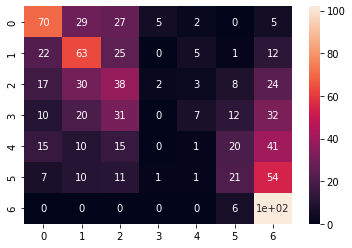

In [100]:
from sklearn.svm import SVC
svm = SVC(random_state=123)
svm.fit(X_train, y_train)
y_train_hat2 = svm.predict(X_train)
y_test_hat2  = svm.predict(X_test)

print(svm)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat2))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat2))



print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_hat2)
sns.heatmap(cr,annot=True)


RandomForestClassifier(n_jobs=-1, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     1.0000    1.0000    1.0000       138
           4     0.9333    0.9844    0.9582       128
           5     0.7778    0.6885    0.7304       122
           6     0.6170    0.5179    0.5631       112
           7     0.7559    0.9412    0.8384       102
           8     0.9619    0.9619    0.9619       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8724       815
   macro avg     0.8637    0.8705    0.8646       815
weighted avg     0.8682    0.8724    0.8679       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

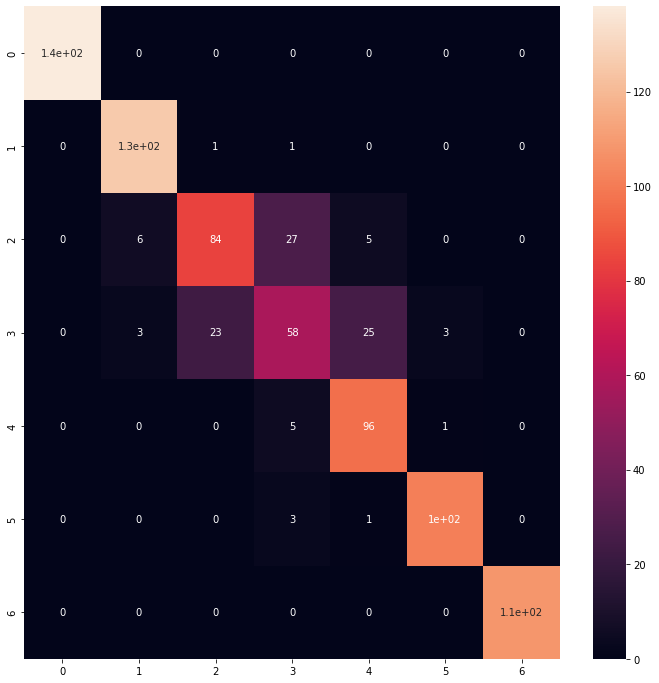

In [101]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1,random_state=123)
rfc.fit(X_train, y_train)

RFC_pred = rfc.predict(X_test)

print(rfc)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, RFC_pred,digits=4))

plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, RFC_pred)
sns.heatmap(cr,annot=True)


# threshold = 0.5

RandomForestClassifier(n_jobs=-1, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9189    0.9855    0.9510       138
           4     0.8898    0.8828    0.8863       128
           5     0.6404    0.5984    0.6186       122
           6     0.6111    0.4911    0.5446       112
           7     0.6792    0.7059    0.6923       102
           8     0.8099    0.9333    0.8673       105
           9     0.9908    1.0000    0.9954       108

    accuracy                         0.8037       815
   macro avg     0.7914    0.7996    0.7936       815
weighted avg     0.7958    0.8037    0.7980       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

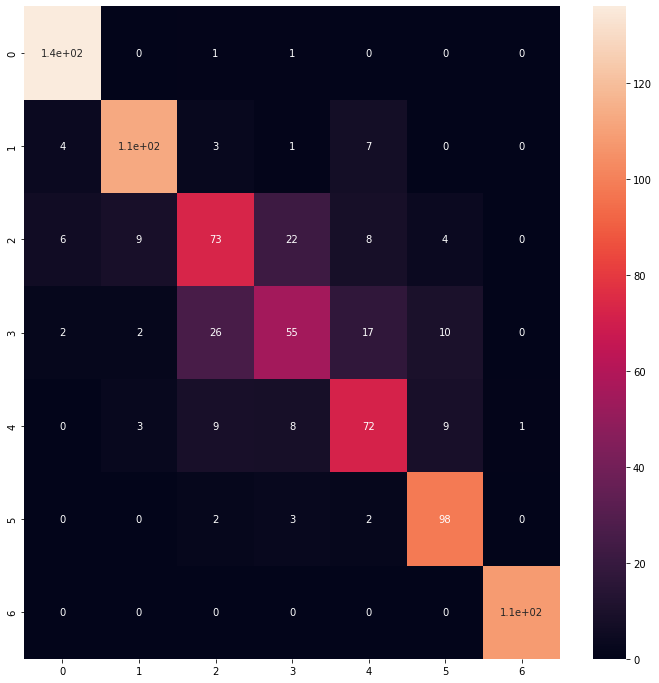

In [102]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(n_jobs=-1,random_state=123)
rfc1.fit(X_train_noncorr1, y_train)

RFC_pred1 = rfc1.predict(X_test_noncorr1)

print(rfc1)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, RFC_pred1,digits=4))

plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, RFC_pred1)
sns.heatmap(cr,annot=True)


# Threshold = 0.6

RandomForestClassifier(n_jobs=-1, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9648    0.9928    0.9786       138
           4     0.8643    0.9453    0.9030       128
           5     0.7217    0.6803    0.7004       122
           6     0.5679    0.4107    0.4767       112
           7     0.6960    0.8529    0.7665       102
           8     0.9423    0.9333    0.9378       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8344       815
   macro avg     0.8224    0.8308    0.8233       815
weighted avg     0.8262    0.8344    0.8271       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

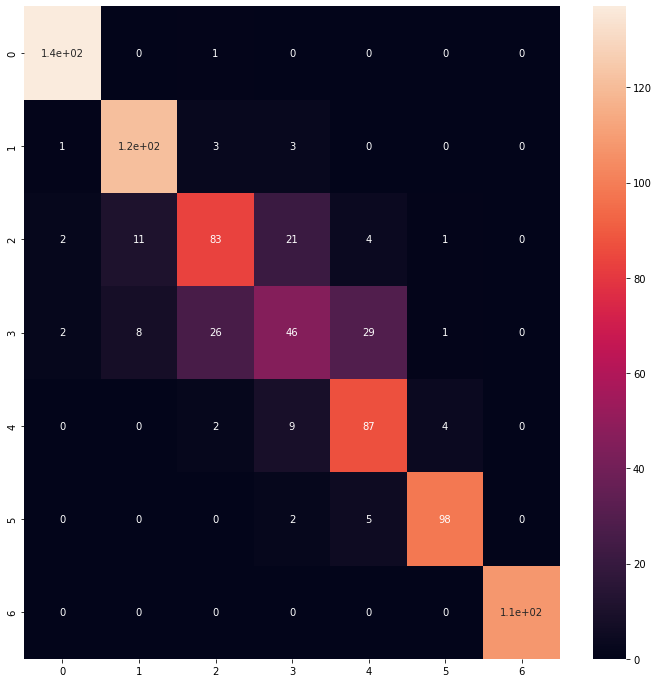

In [103]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_jobs=-1,random_state=123)
rfc2.fit(X_train_noncorr2, y_train)

RFC_pred2 = rfc2.predict(X_test_noncorr2)

print(rfc2)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, RFC_pred2,digits=4))

plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, RFC_pred2)
sns.heatmap(cr,annot=True)


# Threshold = 0.7

RandomForestClassifier(n_jobs=-1, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9928    0.9928    0.9928       138
           4     0.8905    0.9531    0.9208       128
           5     0.7273    0.6557    0.6897       122
           6     0.6022    0.5000    0.5463       112
           7     0.7280    0.8922    0.8018       102
           8     0.9519    0.9429    0.9474       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8503       815
   macro avg     0.8418    0.8481    0.8427       815
weighted avg     0.8458    0.8503    0.8459       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

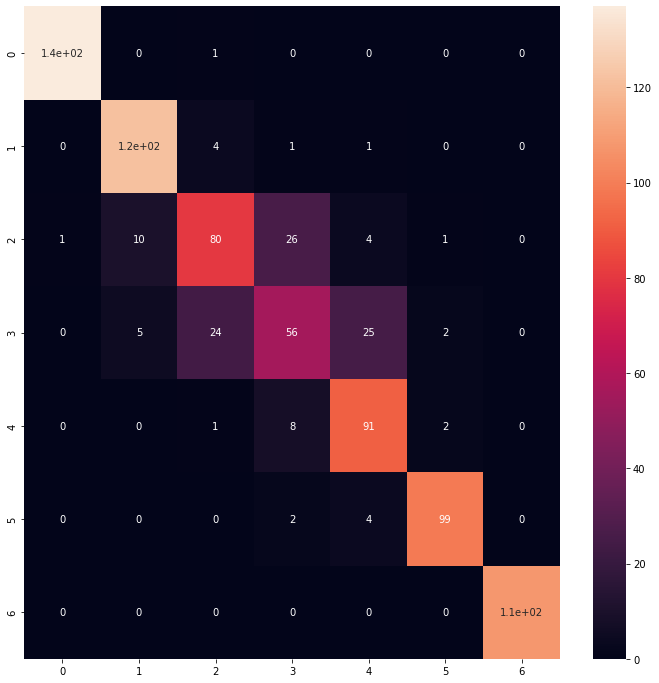

In [104]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc3 = RandomForestClassifier(n_jobs=-1,random_state=123)
rfc3.fit(X_train_noncorr3, y_train)

RFC_pred3 = rfc3.predict(X_test_noncorr3)

print(rfc3)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, RFC_pred3,digits=4))

plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, RFC_pred3)
sns.heatmap(cr,annot=True)


# KNN

KNeighborsClassifier()
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.8204    0.9928    0.8984       138
           4     0.7349    0.9531    0.8299       128
           5     0.6250    0.4508    0.5238       122
           6     0.4386    0.2232    0.2959       112
           7     0.7100    0.6961    0.7030       102
           8     0.8151    0.9238    0.8661       105
           9     0.9153    1.0000    0.9558       108

    accuracy                         0.7546       815
   macro avg     0.7228    0.7485    0.7247       815
weighted avg     0.7233    0.7546    0.7277       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

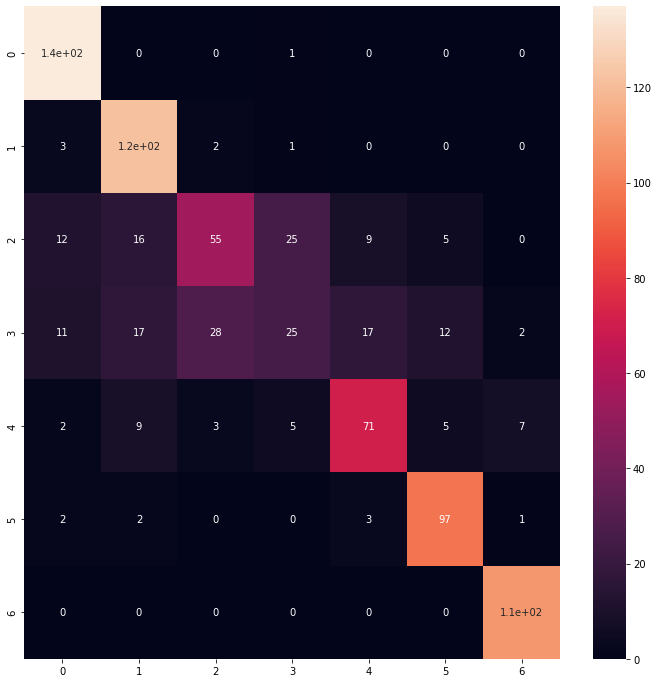

In [105]:
from sklearn.neighbors import KNeighborsClassifier
# K-Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
KNN_pred  = knn.predict(X_test)
print(knn)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, KNN_pred,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, KNN_pred)
sns.heatmap(cr,annot=True)


# Threshold = 0.5

KNeighborsClassifier()
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.7879    0.9420    0.8581       138
           4     0.6503    0.7266    0.6863       128
           5     0.3981    0.3361    0.3644       122
           6     0.4146    0.3036    0.3505       112
           7     0.5161    0.4706    0.4923       102
           8     0.6972    0.7238    0.7103       105
           9     0.8917    0.9907    0.9386       108

    accuracy                         0.6491       815
   macro avg     0.6223    0.6419    0.6287       815
weighted avg     0.6247    0.6491    0.6333       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

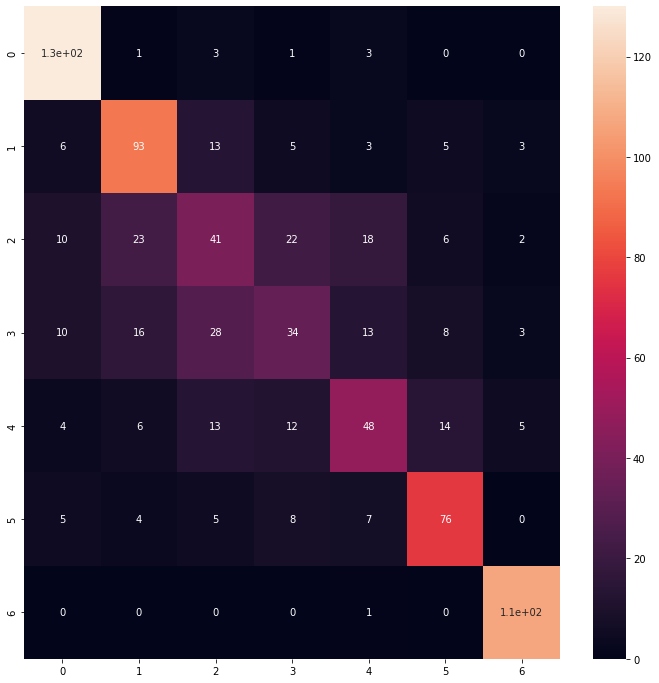

In [106]:
from sklearn.neighbors import KNeighborsClassifier
# K-Neighbors
knn1 = KNeighborsClassifier()
knn1.fit(X_train_noncorr1, y_train)
KNN_pred1  = knn1.predict(X_test_noncorr1)
print(knn1)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, KNN_pred1,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, KNN_pred1)
sns.heatmap(cr,annot=True)


# Threshold = 0.6

KNeighborsClassifier()
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.7939    0.9493    0.8647       138
           4     0.6443    0.7500    0.6931       128
           5     0.4167    0.3279    0.3670       122
           6     0.4231    0.2946    0.3474       112
           7     0.4900    0.4804    0.4851       102
           8     0.6944    0.7143    0.7042       105
           9     0.8992    0.9907    0.9427       108

    accuracy                         0.6515       815
   macro avg     0.6231    0.6439    0.6292       815
weighted avg     0.6261    0.6515    0.6343       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

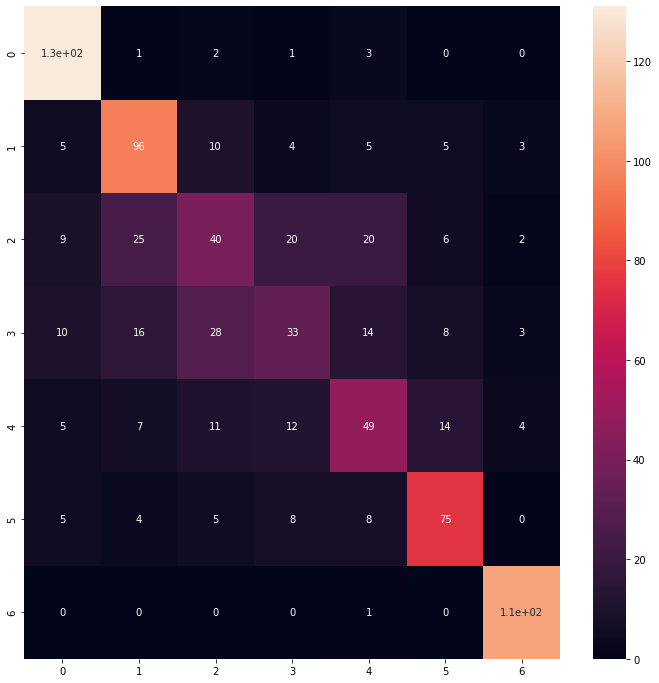

In [107]:
from sklearn.neighbors import KNeighborsClassifier
# K-Neighbors
knn2 = KNeighborsClassifier()
knn2.fit(X_train_noncorr2, y_train)
KNN_pred2  = knn2.predict(X_test_noncorr2)
print(knn2)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, KNN_pred2,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, KNN_pred2)
sns.heatmap(cr,annot=True)


# Threshold = 0.7

KNeighborsClassifier()
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.7988    0.9493    0.8675       138
           4     0.6736    0.7578    0.7132       128
           5     0.4375    0.3443    0.3853       122
           6     0.4938    0.3571    0.4145       112
           7     0.5288    0.5392    0.5340       102
           8     0.7196    0.7333    0.7264       105
           9     0.8992    0.9907    0.9427       108

    accuracy                         0.6736       815
   macro avg     0.6502    0.6674    0.6548       815
weighted avg     0.6525    0.6736    0.6589       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

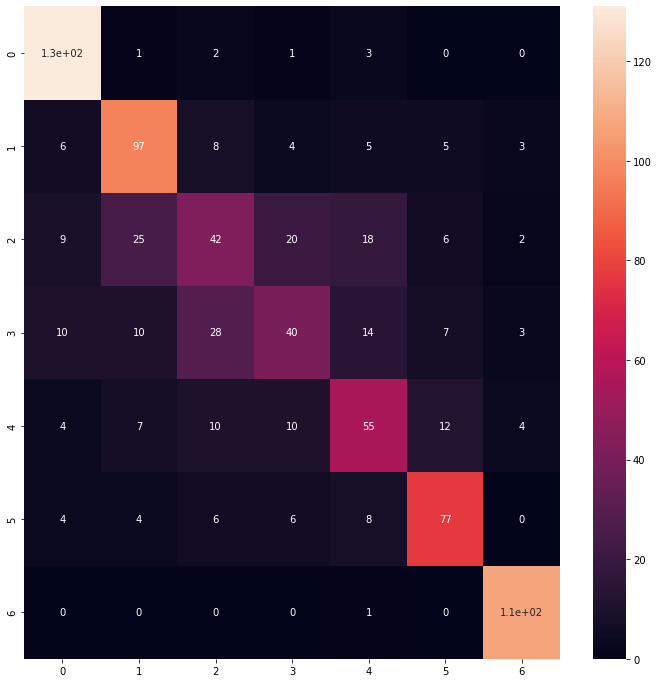

In [108]:
from sklearn.neighbors import KNeighborsClassifier
# K-Neighbors
knn3 = KNeighborsClassifier()
knn3.fit(X_train_noncorr3, y_train)
KNN_pred3  = knn3.predict(X_test_noncorr3)
print(knn3)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, KNN_pred3,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, KNN_pred3)
sns.heatmap(cr,annot=True)


# ABC

AdaBoostClassifier(learning_rate=0.01, n_estimators=200, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.4336    0.4493    0.4413       138
           4     0.6875    0.0859    0.1528       128
           5     0.5000    0.0246    0.0469       122
           6     0.2029    0.5000    0.2887       112
           7     0.2357    0.3235    0.2727       102
           8     0.4821    0.5143    0.4977       105
           9     0.8852    1.0000    0.9391       108

    accuracy                         0.4012       815
   macro avg     0.4896    0.4139    0.3770       815
weighted avg     0.4930    0.4012    0.3681       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

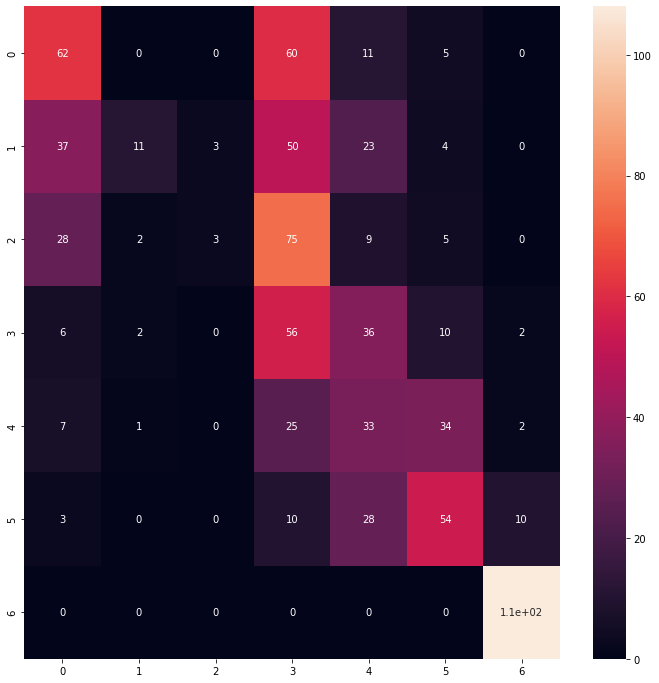

In [109]:
from sklearn.ensemble import AdaBoostClassifier
# K-Neighbors
ABC = AdaBoostClassifier(n_estimators=200,random_state=123,learning_rate=0.01)
ABC.fit(X_train, y_train)
ABC_pred  = ABC.predict(X_test)
print(ABC)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, ABC_pred,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, ABC_pred)
sns.heatmap(cr,annot=True)


# Threshold = 0.5

AdaBoostClassifier(learning_rate=0.01, n_estimators=200, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.4268    0.5072    0.4636       138
           4     0.0000    0.0000    0.0000       128
           5     0.1760    0.3361    0.2310       122
           6     0.2174    0.0446    0.0741       112
           7     0.1373    0.0686    0.0915       102
           8     0.2278    0.3429    0.2738       105
           9     0.5806    1.0000    0.7347       108

    accuracy                         0.3276       815
   macro avg     0.2523    0.3285    0.2669       815
weighted avg     0.2520    0.3276    0.2673       815

Confusion matrix
-------------------------------------------------------


C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<AxesSubplot:>

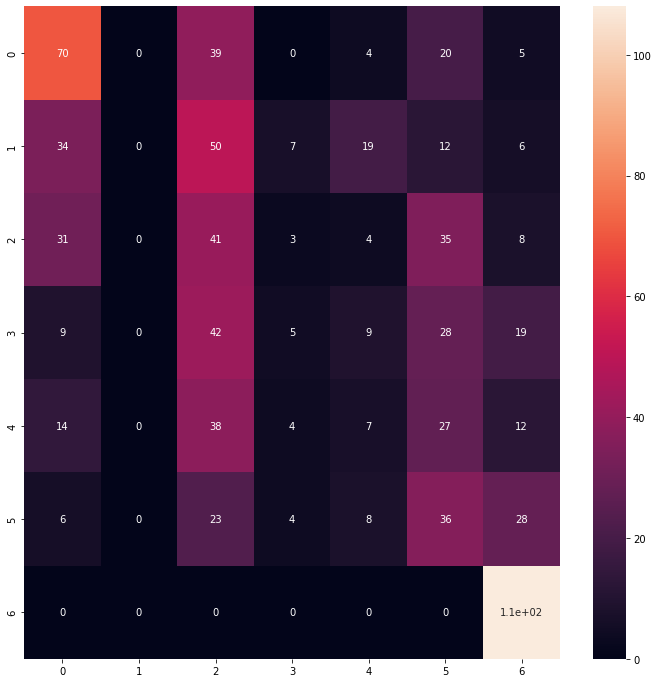

In [110]:
from sklearn.ensemble import AdaBoostClassifier
# K-Neighbors
ABC1 = AdaBoostClassifier(n_estimators=200,random_state=123,learning_rate=0.01)
ABC1.fit(X_train_noncorr1, y_train)
ABC_pred1  = ABC1.predict(X_test_noncorr1)
print(ABC1)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, ABC_pred1,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, ABC_pred1)
sns.heatmap(cr,annot=True)


# threshold = 0.6

AdaBoostClassifier(learning_rate=0.01, n_estimators=200, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.2805    0.1667    0.2091       138
           4     0.3093    0.2344    0.2667       128
           5     0.1034    0.0246    0.0397       122
           6     0.2078    0.6161    0.3108       112
           7     0.2400    0.1176    0.1579       102
           8     0.3786    0.3714    0.3750       105
           9     0.8852    1.0000    0.9391       108

    accuracy                         0.3485       815
   macro avg     0.3436    0.3615    0.3283       815
weighted avg     0.3362    0.3485    0.3185       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

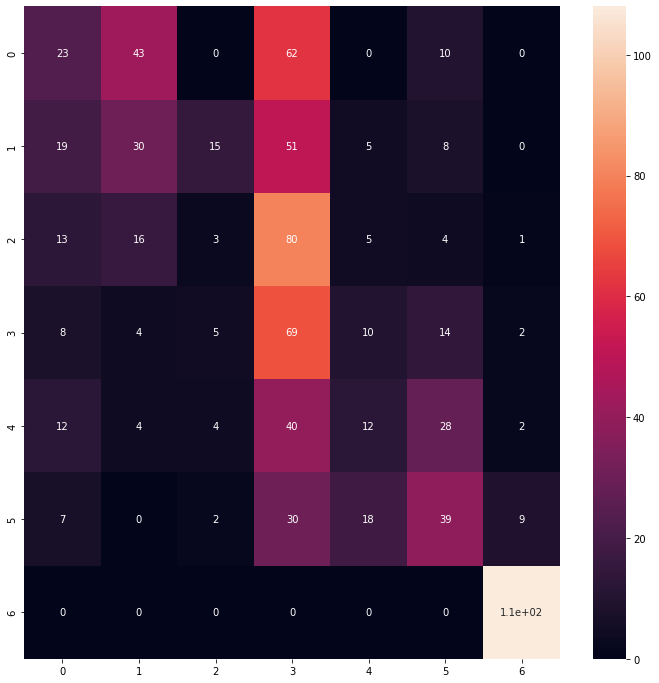

In [111]:
from sklearn.ensemble import AdaBoostClassifier
# K-Neighbors
ABC2 = AdaBoostClassifier(n_estimators=200,random_state=123,learning_rate=0.01)
ABC2.fit(X_train_noncorr2, y_train)
ABC_pred2  = ABC2.predict(X_test_noncorr2)
print(ABC2)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, ABC_pred2,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, ABC_pred2)
sns.heatmap(cr,annot=True)


# threshold = 0.7

AdaBoostClassifier(learning_rate=0.01, n_estimators=200, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.2805    0.1667    0.2091       138
           4     0.3093    0.2344    0.2667       128
           5     0.1034    0.0246    0.0397       122
           6     0.2078    0.6161    0.3108       112
           7     0.2400    0.1176    0.1579       102
           8     0.3786    0.3714    0.3750       105
           9     0.8852    1.0000    0.9391       108

    accuracy                         0.3485       815
   macro avg     0.3436    0.3615    0.3283       815
weighted avg     0.3362    0.3485    0.3185       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

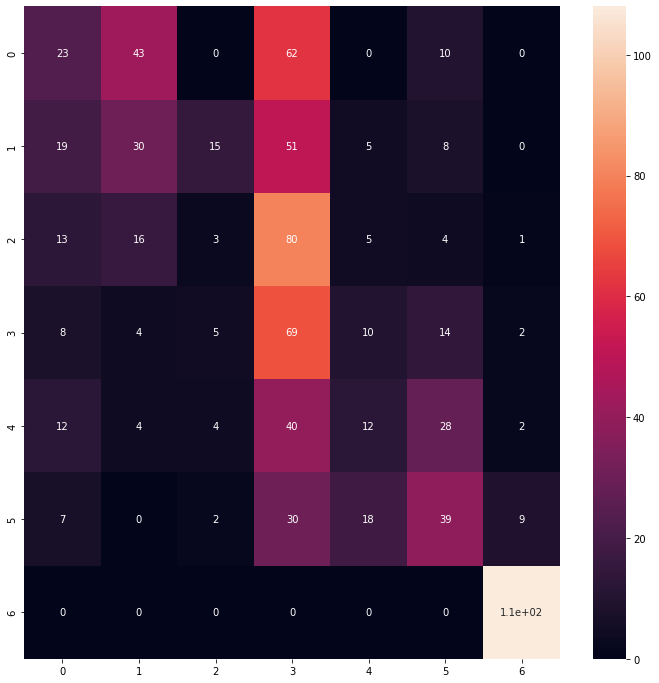

In [112]:
from sklearn.ensemble import AdaBoostClassifier

ABC3 = AdaBoostClassifier(n_estimators=200,random_state=123,learning_rate=0.01)
ABC3.fit(X_train_noncorr3, y_train)
ABC_pred3  = ABC3.predict(X_test_noncorr3)
print(ABC)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, ABC_pred3,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, ABC_pred3)
sns.heatmap(cr,annot=True)


 # Voting

In [135]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=42)
model2 = ExtraTreesClassifier()
model3 = DecisionTreeClassifier(random_state=42)
model4 = RandomForestClassifier(random_state=42)
# define the voting ensemble model
ensemble = VotingClassifier(estimators=[('RFC', rfc), ('ETC', etc)], voting='hard')

# fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# make predictions on the test data
y_pred = ensemble.predict(X_test)

# evaluate the ensemble model
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of the voting ensemble model: {:.2f}%".format(accuracy*100))


Accuracy of the voting ensemble model: 87.61%


In [118]:
estimators = [
    ('RFC', RandomForestClassifier(n_estimators=110, random_state=123)),
    ('ETC', ExtraTreesClassifier(n_estimators=110)),
#     ('DTC',DecisionTreeClassifier()),
#     ('GB',GradientBoostingClassifier(n_estimators=120,random_state=123))
]

In [125]:
estimators1 = [
    ('RFC', RandomForestClassifier(n_estimators=110, random_state=123)),
    ('ETC', ExtraTreesClassifier(n_estimators=110)),
    ('DTC',DecisionTreeClassifier()),
#     ('GB',GradientBoostingClassifier(n_estimators=120,random_state=123))
]

In [119]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=GradientBoostingClassifier(),
    cv=10
)

In [121]:
clf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('RFC',
                                RandomForestClassifier(n_estimators=110,
                                                       random_state=123)),
                               ('ETC', ExtraTreesClassifier(n_estimators=110))],
                   final_estimator=GradientBoostingClassifier())

In [122]:
y_pred = clf.predict(X_test)

# RFC ETC with GBC CV = 10

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8785276073619632

## RFC, ETC, DTC with GBC CV = 10

In [126]:
from sklearn.ensemble import StackingClassifier

clf1 = StackingClassifier(
    estimators=estimators1, 
    final_estimator=GradientBoostingClassifier(),
    cv=10
)

In [127]:
clf1.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('RFC',
                                RandomForestClassifier(n_estimators=110,
                                                       random_state=123)),
                               ('ETC', ExtraTreesClassifier(n_estimators=110)),
                               ('DTC', DecisionTreeClassifier())],
                   final_estimator=GradientBoostingClassifier())

In [128]:
y_pred2 = clf1.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)
print(classification_report(y_test,y_pred2,digits=4))

              precision    recall  f1-score   support

           3     0.9928    1.0000    0.9964       138
           4     0.9843    0.9766    0.9804       128
           5     0.7944    0.6967    0.7424       122
           6     0.6190    0.6964    0.6555       112
           7     0.8667    0.8922    0.8792       102
           8     0.9806    0.9619    0.9712       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8908       815
   macro avg     0.8911    0.8891    0.8893       815
weighted avg     0.8940    0.8908    0.8916       815



# Voting on above two voting hard = 88.83

In [136]:
ensemble_stack = VotingClassifier(estimators=[('RFC', clf), ('ETC', clf1)], voting='hard')

# fit the ensemble model on the training data
ensemble_stack.fit(X_train, y_train)

# make predictions on the test data
y_pred_stack = ensemble_stack.predict(X_test)

# evaluate the ensemble model
accuracy = accuracy_score(y_pred_stack, y_test)
print("Accuracy of the voting ensemble model: {:.2f}%".format(accuracy*100))


Accuracy of the voting ensemble model: 88.83%


## Soft Voting

In [142]:
print(classification_report(y_pred_stack, y_test,digits=4))

              precision    recall  f1-score   support

           3     1.0000    0.9928    0.9964       139
           4     0.9922    0.9549    0.9732       133
           5     0.6967    0.7798    0.7359       109
           6     0.7054    0.6220    0.6611       127
           7     0.8333    0.8854    0.8586        96
           8     0.9714    0.9903    0.9808       103
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8883       815
   macro avg     0.8856    0.8893    0.8866       815
weighted avg     0.8890    0.8883    0.8878       815



In [137]:
ensemble_stack_ = VotingClassifier(estimators=[('RFC', clf), ('ETC', clf1)], voting='soft')

# fit the ensemble model on the training data
ensemble_stack_.fit(X_train, y_train)

# make predictions on the test data
y_pred_stack_ = ensemble_stack.predict(X_test)

# evaluate the ensemble model
accuracy = accuracy_score(y_pred_stack_, y_test)
print("Accuracy of the voting ensemble model: {:.2f}%".format(accuracy*100))


Accuracy of the voting ensemble model: 88.83%


In [140]:
print(classification_report(y_pred_stack_, y_test,digits=4))

              precision    recall  f1-score   support

           3     1.0000    0.9928    0.9964       139
           4     0.9922    0.9549    0.9732       133
           5     0.6967    0.7798    0.7359       109
           6     0.7054    0.6220    0.6611       127
           7     0.8333    0.8854    0.8586        96
           8     0.9714    0.9903    0.9808       103
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8883       815
   macro avg     0.8856    0.8893    0.8866       815
weighted avg     0.8890    0.8883    0.8878       815



## ETC, RFC with ETC CV = 10

In [143]:
from sklearn.ensemble import StackingClassifier

clf2 = StackingClassifier(
    estimators=estimators, 
    final_estimator=ExtraTreesClassifier(),
    cv=10
)

In [144]:
clf2.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('RFC',
                                RandomForestClassifier(n_estimators=110,
                                                       random_state=123)),
                               ('ETC', ExtraTreesClassifier(n_estimators=110))],
                   final_estimator=ExtraTreesClassifier())

In [145]:
y_pred3 = clf2.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred3)

0.8797546012269939

In [149]:
print(classification_report(y_test,y_pred3,digits=4))

              precision    recall  f1-score   support

           3     0.9928    1.0000    0.9964       138
           4     0.9685    0.9609    0.9647       128
           5     0.8081    0.6557    0.7240       122
           6     0.6000    0.7232    0.6559       112
           7     0.8365    0.8529    0.8447       102
           8     0.9709    0.9524    0.9615       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8798       815
   macro avg     0.8824    0.8779    0.8782       815
weighted avg     0.8859    0.8798    0.8808       815

